In [1]:
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import acquire
import prepare
import explore
import model

In [2]:
acquire.print_libs()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import os
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
import warnings

Goal for this notebook will be to generate 10-20 models per algorithm and then compare those to the baseline and each other.
- [x] Split dataset
- [x] Split into X sets
- [x] Split into y sets
- [ ] Create function to split into X and y sets
- [ ] Create for loop to run through each test
- [ ] Create function that generates DataFrame of the models
- [ ] Isolate best scoring models per algorithm (base off train/validate difference)
- [ ] Create function to return best model
- [ ] Add to model.py

In [5]:
# import dataset
raw_telco = acquire.get_telco_data()
acquire.df_info(raw_telco)

Reading from file...


,nunique,dtypes,isnull,6039
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,3
customer_id,7043,object,0,8559-WNQZS
gender,2,object,0,Male
senior_citizen,2,int64,0,0
partner,2,object,0,No
dependents,2,object,0,No
tenure,73,int64,0,1
phone_service,2,object,0,Yes


In [6]:
# prepare dataset
telco = prepare.prep_telco(raw_telco)
acquire.df_info(telco)

,nunique,dtypes,isnull,4199-QHJNM
gender,2,object,0,Male
senior_citizen,2,object,0,Yes
married,2,object,0,Yes
children,2,object,0,No
tenure_months,73,int64,0,67
paperless_billing,2,object,0,No
monthly_charges,1585,float64,0,102.9
total_charges,6531,float64,0,6989.7
churn,2,object,0,No
contract_type,3,object,0,Two year


In [7]:
# split dataset
tvt_set = train,validate,test = prepare.split_df(telco,'churn')
[print(set.shape) for set in tvt_set]

acquire.df_info(train)

(4225, 16)
(1409, 16)
(1409, 16)


,nunique,dtypes,isnull,4936-YPJNK
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,10
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,19.9
total_charges,4006,float64,0,199.45
churn,2,object,0,No
contract_type,3,object,0,Month-to-month


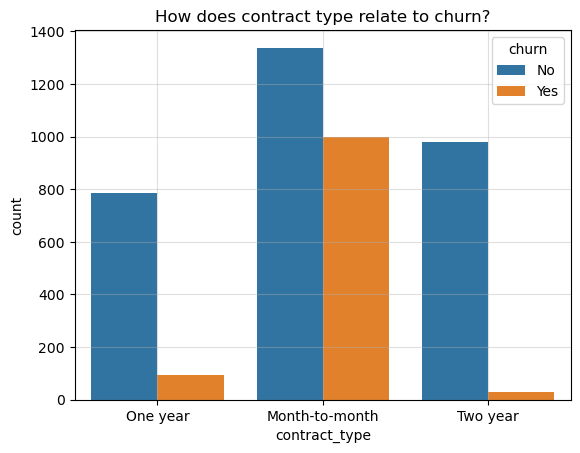

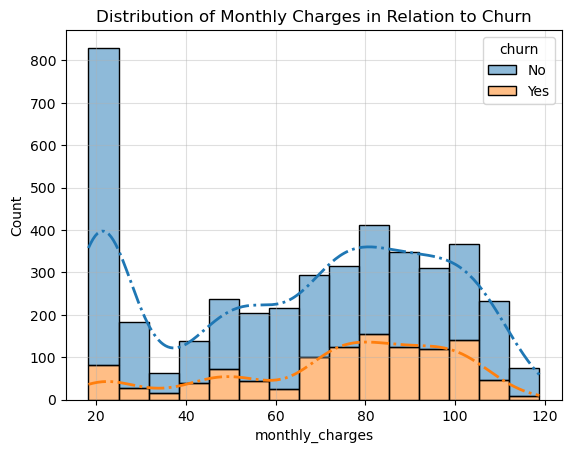

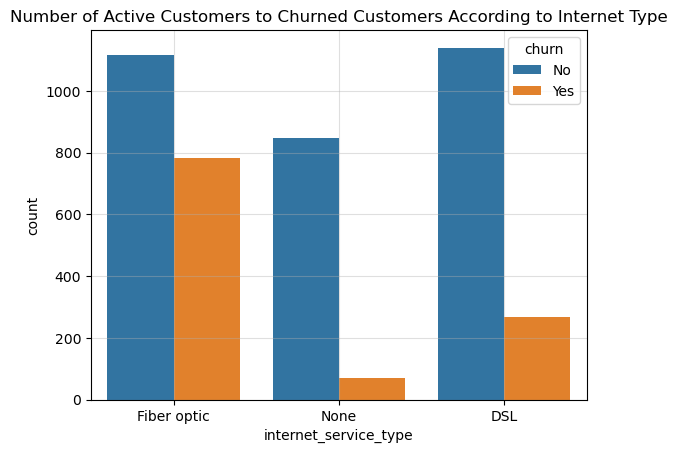

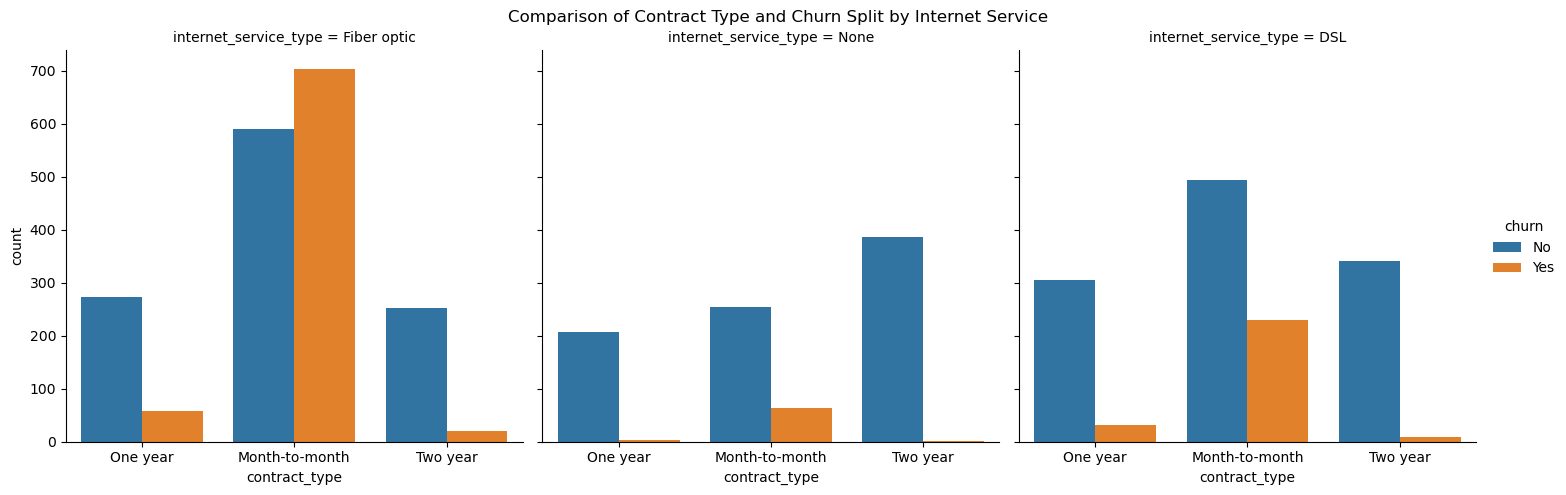

In [8]:
# plot train
explore.telco_plots(train)

In [9]:
# drop extra columns
acquire.df_info(train)

,nunique,dtypes,isnull,5392-AKEMH
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,12
paperless_billing,2,object,0,Yes
monthly_charges,1374,float64,0,45.05
total_charges,4006,float64,0,523.1
churn,2,object,0,No
contract_type,3,object,0,Month-to-month


In [10]:
prepare.drop_cols(train,extras=True,cols=['total_charges','payment_type'],degree=7)

,tenure_months,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,streaming,protection,support
customer_id,,,,,,,,,
4083-BFNYK,38,No,95.00,No,One year,Fiber optic,Movies,Online Security,Online Backup
5804-LEPIM,2,Yes,70.35,Yes,Month-to-month,Fiber optic,Neither,Neither,Neither
4895-TMWIR,11,No,19.95,Yes,Month-to-month,None,No internet service,No internet service,No internet service
1342-JPNKI,10,Yes,86.05,Yes,Month-to-month,Fiber optic,TV,Neither,Neither
3397-AVTKU,43,Yes,60.00,No,Two year,DSL,Movies,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,No,70.50,Yes,Month-to-month,Fiber optic,Neither,Neither,Neither
7025-WCBNE,47,No,59.60,No,Two year,DSL,Neither,Neither,Both
9788-HNGUT,72,Yes,116.95,No,Two year,Fiber optic,Both,Both,Both


In [11]:
filtered = f_train,f_validate,f_test = [prepare.drop_cols(set_,extras=True,cols=['total_charges','payment_type'],degree=7)
 for set_ in tvt_set
]

acquire.df_info(f_train)

,nunique,dtypes,isnull,7009-PCARS
tenure_months,73,int64,0,55
paperless_billing,2,object,0,No
monthly_charges,1374,float64,0,19.1
churn,2,object,0,No
contract_type,3,object,0,One year
internet_service_type,3,object,0,None
streaming,5,object,0,No internet service
protection,5,object,0,No internet service
support,5,object,0,No internet service


In [12]:
# encode dataset
model.encode_df(f_train,'churn')

,tenure_months,monthly_charges,churn,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,internet_service_type_is_Fiber optic,internet_service_type_is_None,streaming_is_Movies,streaming_is_Neither,streaming_is_No internet service,streaming_is_TV,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,Yes,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,Yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,Yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,No,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,Yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,No,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,No,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoded = e_train,e_validate,e_test = [model.encode_df(set_,'churn') for set_ in filtered]

acquire.df_info(e_train)

,nunique,dtypes,isnull,4573-JKNAE
tenure_months,73,int64,0,12
monthly_charges,1374,float64,0,19.35
churn,2,object,0,No
paperless_billing_is_Yes,2,float64,0,0.0
contract_type_is_One year,2,float64,0,0.0
contract_type_is_Two year,2,float64,0,1.0
internet_service_type_is_Fiber optic,2,float64,0,0.0
internet_service_type_is_None,2,float64,0,1.0
streaming_is_Movies,2,float64,0,0.0
streaming_is_Neither,2,float64,0,0.0


In [14]:
# split X sets
e_train.drop(columns='churn')

,tenure_months,monthly_charges,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,internet_service_type_is_Fiber optic,internet_service_type_is_None,streaming_is_Movies,streaming_is_Neither,streaming_is_No internet service,streaming_is_TV,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_sets = X_train,X_validate,X_test = [set_.drop(columns='churn') for set_ in encoded]

acquire.df_info(X_train)

,nunique,dtypes,isnull,1775-KWJKQ
tenure_months,73,int64,0,72.00
monthly_charges,1374,float64,0,89.85
paperless_billing_is_Yes,2,float64,0,0.00
contract_type_is_One year,2,float64,0,0.00
contract_type_is_Two year,2,float64,0,1.00
internet_service_type_is_Fiber optic,2,float64,0,0.00
internet_service_type_is_None,2,float64,0,0.00
streaming_is_Movies,2,float64,0,0.00
streaming_is_Neither,2,float64,0,0.00
streaming_is_No internet service,2,float64,0,0.00


In [16]:
# split y sets
y_sets = y_train,y_validate,y_test = [set_.churn for set_ in encoded]

y_train.head()

customer_id
4083-BFNYK     No
5804-LEPIM    Yes
4895-TMWIR    Yes
1342-JPNKI    Yes
3397-AVTKU     No
Name: churn, dtype: object

In [17]:
# get baseline
y_train.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

In [18]:
baseline = y_train.mode()[0]
baseline

'No'

In [19]:
# get baseline accuracy
baseline_acc = (baseline == y_train).mean()
baseline_acc

0.7346745562130178

In [20]:
# Set random_state
r_parameter = 123

In [21]:
# run decision tree
clf = DecisionTreeClassifier(max_depth=1)
clf

DecisionTreeClassifier(max_depth=1)

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [23]:
clf.score(X_train,y_train)

0.7358579881656805

In [24]:
clf.predict(X_train)

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [25]:
# test creating model dictionary
clf_y_pred = {
    'actual':y_train,
    'baseline':baseline,
    'model':clf.predict(X_train)
}

pd.DataFrame(clf_y_pred)

,actual,baseline,model
customer_id,,,
4083-BFNYK,No,No,No
5804-LEPIM,Yes,No,Yes
4895-TMWIR,Yes,No,No
1342-JPNKI,Yes,No,Yes
3397-AVTKU,No,No,No
...,...,...,...
1915-IOFGU,Yes,No,Yes
7025-WCBNE,No,No,No
9788-HNGUT,No,No,No


In [26]:
# loop decision tree
clf = [DecisionTreeClassifier(max_depth=i+1,) for i in range(20)]
clf

[DecisionTreeClassifier(max_depth=1),
 DecisionTreeClassifier(max_depth=2),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=4),
 DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=6),
 DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=9),
 DecisionTreeClassifier(max_depth=10),
 DecisionTreeClassifier(max_depth=11),
 DecisionTreeClassifier(max_depth=12),
 DecisionTreeClassifier(max_depth=13),
 DecisionTreeClassifier(max_depth=14),
 DecisionTreeClassifier(max_depth=15),
 DecisionTreeClassifier(max_depth=16),
 DecisionTreeClassifier(max_depth=17),
 DecisionTreeClassifier(max_depth=18),
 DecisionTreeClassifier(max_depth=19),
 DecisionTreeClassifier(max_depth=20)]

In [27]:
for model in clf:
    model.fit(X_train,y_train)

In [28]:
for model in clf:
    # print(model.score(X_train,y_train))
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_validate,y_validate)
    
    print(train_acc - val_acc)

0.010520869641904795
-0.004124121770024414
-0.00223063064576412
0.009601673098970753
0.014098042591791482
0.024985952519937404
0.02971968033058825
0.04676042852163398
0.08012413856820688
0.09621881312441993
0.1388112766198697
0.15608904716509675
0.1662699215944835
0.17904997879229467
0.1958530327018616
0.20271760995460297
0.21786150738490095
0.22117713263424899
0.2325353916706212
0.23513994985742548


In [29]:
# TO DO:
# create dictionary holding model w/number, the train accuracy, the validate accuracy, and the depth
# turn dictionary into dataframe, then add on difference in accuracy and the average
# plot it!
# perfect it, turn it into a function with a nice sticker

In [30]:
# create list to hold stats
metrics = []

for i in range(20):
    # print(i+1)
    model = DecisionTreeClassifier(max_depth=i+1,random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'type':'DecisionTree',
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'max_depth='+str(i+1)
    }
    
    metrics.append(output)

dt_metrics = pd.DataFrame(metrics)
dt_metrics['difference'] = dt_metrics.train_acc - dt_metrics.validate_acc
dt_metrics['average'] = dt_metrics[['train_acc','validate_acc']].mean(axis=1)

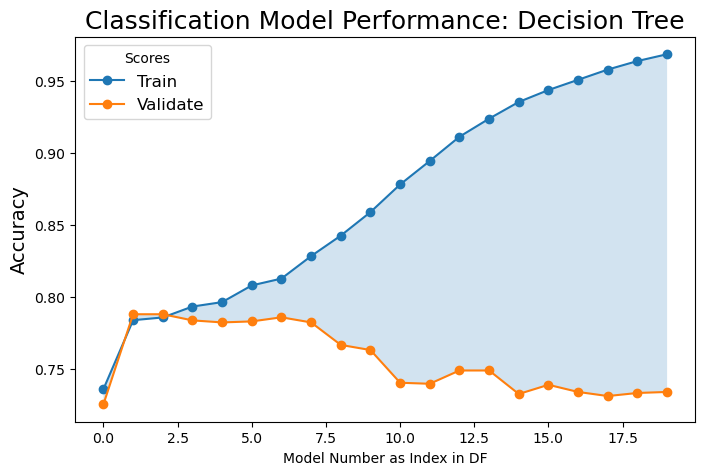

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(dt_metrics.index, dt_metrics.train_acc, label="Train", marker="o")
plt.plot(dt_metrics.index, dt_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(dt_metrics.index, dt_metrics.train_acc, dt_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Decision Tree", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [32]:
# drop anything below baseline
dt_metrics = dt_metrics[dt_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
dt_metrics = dt_metrics[dt_metrics.difference.round(1) < dt_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
dt_metrics = dt_metrics[dt_metrics.average >= dt_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
dt_metrics = dt_metrics[dt_metrics.validate_acc > dt_metrics.validate_acc.mean()]

dt_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
7,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.828166,0.782115,max_depth=8,0.046051,0.805140
8,DecisionTree,"DecisionTreeClassifier(max_depth=9, random_state=123)",0.842367,0.766501,max_depth=9,0.075866,0.804434


In [33]:
# top_models = metrics
# top_models

In [34]:
# run random forest
rf = RandomForestClassifier(max_depth=1)

In [35]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1)

In [36]:
rf.score(X_train,y_train)

0.7346745562130178

In [37]:
# loop random forest
metrics = []

for i in range(20):
    # print(i+1)
    model = RandomForestClassifier(max_depth=i+1,random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'type':'RandomForest',
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'max_depth='+str(i+1)
    }
    
    metrics.append(output)

rf_metrics = pd.DataFrame(metrics)
rf_metrics['difference'] = rf_metrics.train_acc - rf_metrics.validate_acc
rf_metrics['average'] = rf_metrics[['train_acc','validate_acc']].mean(axis=1)

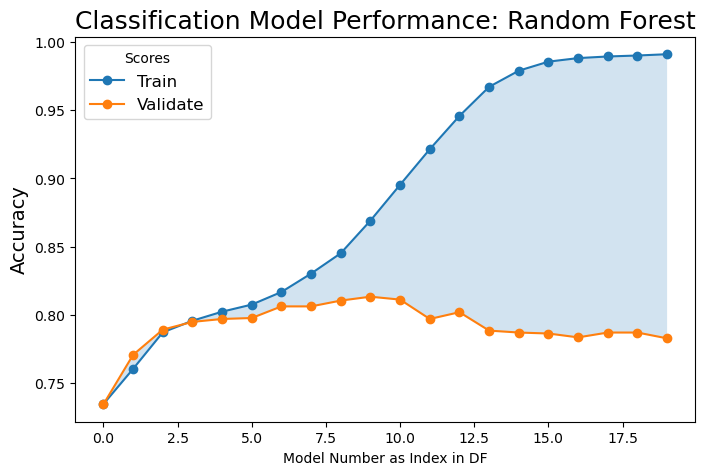

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(rf_metrics.index, rf_metrics.train_acc, label="Train", marker="o")
plt.plot(rf_metrics.index, rf_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(rf_metrics.index, rf_metrics.train_acc, rf_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Random Forest", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [39]:
# drop anything below baseline
rf_metrics = rf_metrics[rf_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
rf_metrics = rf_metrics[rf_metrics.difference.round(1) < rf_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
rf_metrics = rf_metrics[rf_metrics.average >= rf_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
rf_metrics = rf_metrics[rf_metrics.validate_acc > rf_metrics.validate_acc.mean()]

rf_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
8,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.845207,0.810504,max_depth=9,0.034703,0.827856
9,RandomForest,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.869112,0.813343,max_depth=10,0.055770,0.841228


In [40]:
# top_models + metrics

In [41]:
# run KNN
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
knn.score(np.ascontiguousarray(X_train),y_train)

0.834792899408284

In [44]:
# loop KNN
metrics = []

for i in range(20):
    # print(i+1)
    model = KNeighborsClassifier(n_neighbors=i+1)
    
    model.fit(X_train,y_train)
    
    output = {
        'type':'KNN',
        'model':model,
        'train_acc':model.score(np.ascontiguousarray(X_train),y_train),
        'validate_acc':model.score(np.ascontiguousarray(X_validate),y_validate),
        'hyperparameters':'n_neighbors='+str(i+1)
    }
    
    metrics.append(output)

knn_metrics = pd.DataFrame(metrics)
knn_metrics['difference'] = knn_metrics.train_acc - knn_metrics.validate_acc
knn_metrics['average'] = knn_metrics[['train_acc','validate_acc']].mean(axis=1)

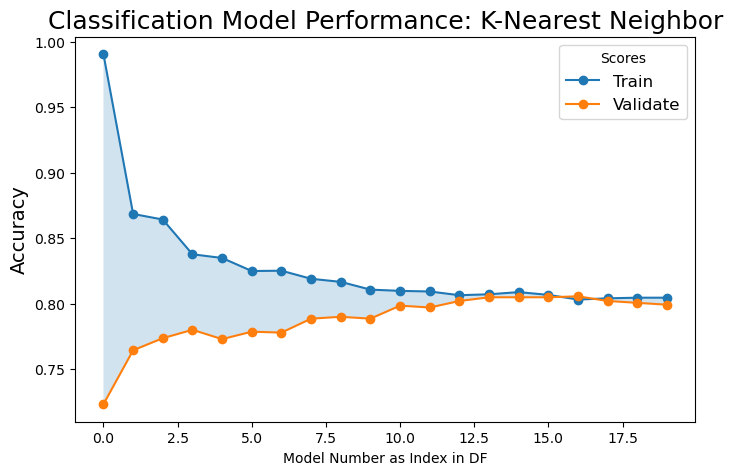

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(knn_metrics.index, knn_metrics.train_acc, label="Train", marker="o")
plt.plot(knn_metrics.index, knn_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(knn_metrics.index, knn_metrics.train_acc, knn_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: K-Nearest Neighbor", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [46]:
# drop anything below baseline
knn_metrics = knn_metrics[knn_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
knn_metrics = knn_metrics[knn_metrics.difference.round(1) < knn_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
knn_metrics = knn_metrics[knn_metrics.average >= knn_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
knn_metrics = knn_metrics[knn_metrics.validate_acc > knn_metrics.validate_acc.mean()]

knn_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
16,KNN,KNeighborsClassifier(n_neighbors=17),0.803077,0.805536,n_neighbors=17,-0.002459,0.804306
15,KNN,KNeighborsClassifier(n_neighbors=16),0.806627,0.804826,n_neighbors=16,0.001801,0.805727
17,KNN,KNeighborsClassifier(n_neighbors=18),0.804024,0.801987,n_neighbors=18,0.002036,0.803005


In [47]:
# run logistic regression
lr = LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
lr.score(X_train,y_train)

0.7964497041420119

In [50]:
for i in range(20,0,-1):
    print(i/10)

2.0
1.9
1.8
1.7
1.6
1.5
1.4
1.3
1.2
1.1
1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


In [51]:
# loop logistic regression
metrics = []

for i in range(20,0,-1):
    model = LogisticRegression(C=(i),random_state=r_parameter)
    
    model.fit(X_train,y_train)
    
    output = {
        'type':'LogisticRegression',
        'model':model,
        'train_acc':model.score(X_train,y_train),
        'validate_acc':model.score(X_validate,y_validate),
        'hyperparameters':'C='+str(i)
    }
    
    metrics.append(output)

lr_metrics = pd.DataFrame(metrics)
lr_metrics['difference'] = lr_metrics.train_acc - lr_metrics.validate_acc
lr_metrics['average'] = lr_metrics[['train_acc','validate_acc']].mean(axis=1)

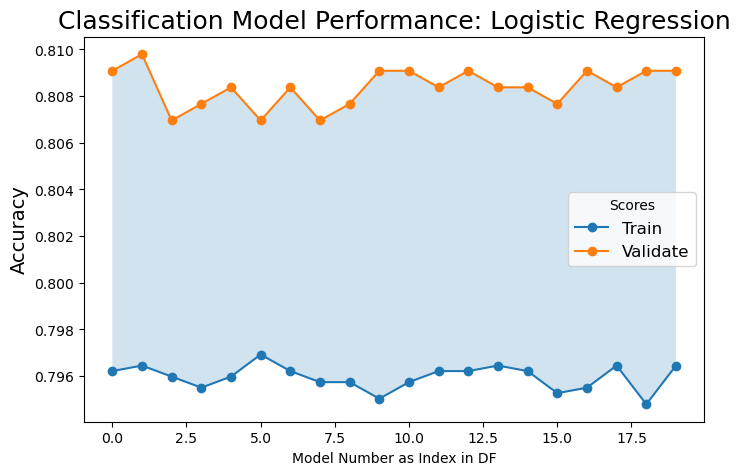

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(lr_metrics.index, lr_metrics.train_acc, label="Train", marker="o")
plt.plot(lr_metrics.index, lr_metrics.validate_acc, label="Validate", marker="o")
plt.fill_between(lr_metrics.index, lr_metrics.train_acc, lr_metrics.validate_acc, alpha=0.2)
plt.xlabel("Model Number as Index in DF", fontsize=10)
plt.ylabel("Accuracy", fontsize=14)
plt.title(f"Classification Model Performance: Logistic Regression", fontsize=18)
plt.legend(title="Scores", fontsize=12)
plt.show()

In [53]:
# drop anything below baseline
lr_metrics = lr_metrics[lr_metrics.validate_acc > baseline_acc]

# drop anything with a difference bigger than 0.1
lr_metrics = lr_metrics[lr_metrics.difference.round(1) < lr_metrics.difference.round(1).max()]

# drop anything with an average less than average rounded to 1 decimal
lr_metrics = lr_metrics[lr_metrics.average >= lr_metrics.average.round(1)]

# drop rows that are less than or equal to the validate mean
lr_metrics = lr_metrics[lr_metrics.validate_acc > lr_metrics.validate_acc.mean()]

lr_metrics.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:3]

,type,model,train_acc,validate_acc,hyperparameters,difference,average


In [54]:
models = pd.concat([dt_metrics,rf_metrics,knn_metrics,lr_metrics],ignore_index=True)
models

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.828166,0.782115,max_depth=8,0.046051,0.805140
1,DecisionTree,"DecisionTreeClassifier(max_depth=9, random_state=123)",0.842367,0.766501,max_depth=9,0.075866,0.804434
2,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.845207,0.810504,max_depth=9,0.034703,0.827856
3,RandomForest,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.869112,0.813343,max_depth=10,0.055770,0.841228
4,KNN,KNeighborsClassifier(n_neighbors=11),0.809704,0.798439,n_neighbors=11,0.011266,0.804071
5,KNN,KNeighborsClassifier(n_neighbors=12),0.809231,0.797019,n_neighbors=12,0.012212,0.803125
6,KNN,KNeighborsClassifier(n_neighbors=13),0.806391,0.801987,n_neighbors=13,0.004403,0.804189
7,KNN,KNeighborsClassifier(n_neighbors=14),0.807101,0.804826,n_neighbors=14,0.002274,0.805963
8,KNN,KNeighborsClassifier(n_neighbors=15),0.808757,0.804826,n_neighbors=15,0.003931,0.806792
9,KNN,KNeighborsClassifier(n_neighbors=16),0.806627,0.804826,n_neighbors=16,0.001801,0.805727


In [55]:
# drop models that are below the validate mean
models = models[models.validate_acc > models.validate_acc.mean()]
models

,type,model,train_acc,validate_acc,hyperparameters,difference,average
2,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.845207,0.810504,max_depth=9,0.034703,0.827856
3,RandomForest,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.869112,0.813343,max_depth=10,0.055770,0.841228
6,KNN,KNeighborsClassifier(n_neighbors=13),0.806391,0.801987,n_neighbors=13,0.004403,0.804189
7,KNN,KNeighborsClassifier(n_neighbors=14),0.807101,0.804826,n_neighbors=14,0.002274,0.805963
8,KNN,KNeighborsClassifier(n_neighbors=15),0.808757,0.804826,n_neighbors=15,0.003931,0.806792
9,KNN,KNeighborsClassifier(n_neighbors=16),0.806627,0.804826,n_neighbors=16,0.001801,0.805727
10,KNN,KNeighborsClassifier(n_neighbors=17),0.803077,0.805536,n_neighbors=17,-0.002459,0.804306
11,KNN,KNeighborsClassifier(n_neighbors=18),0.804024,0.801987,n_neighbors=18,0.002036,0.803005
12,KNN,KNeighborsClassifier(n_neighbors=19),0.804497,0.800568,n_neighbors=19,0.003929,0.802532


In [56]:
models[models.average > models.average.mean()]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
2,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.845207,0.810504,max_depth=9,0.034703,0.827856
3,RandomForest,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.869112,0.813343,max_depth=10,0.055770,0.841228


## Create functions!
- [x] X,y sets
    - Takes tvt_set and returns X_sets and y_sets (both are lists)
- [x] DecisionTree
    - Takes X_sets and y_sets and returns dataframe with models and scores
- [x] RandomForest
    - Takes X_sets and y_sets and returns dataframe with models and scores
- [x] KNN
    - takes X_sets and y_sets and returns dataframe with models and scores
- [x] LogisticRegression
    - takes X_sets and y_sets and returns dataframe with models and scores
- [ ] Great filter
    - takes a dataframe of models, runs it through filters, returns modified dataframe of models
- [ ] Final solution
    - takes dataframes of models, applies basic filters

In [58]:
from model import encode_df

In [59]:
def Xy_sets(tvt_set,target):
    '''
    Encodes and returns X_sets and y_sets. Takes a list of dataframes(train/validate/test). Iterates through each applying the encode_df function. Then splits the dataframes into the X and y sets.
    
    Requires X_set and y_set.
        X_set is a list of 3 dataframes with the target column dropped (should be in train, validate, test order)
        y_set is a list of 3 Series containing the target column that was dropped (should be in train, validate, test order)
    '''
    X_set = []
    y_set = []
    
    # encode and split into X and y
    # for the sets, 0 = train, 1 = validate, 2 = test (assuming that the tvt_set has been passed in proper order)
    for set_ in tvt_set:
        encoded_df = encode_df(set_,target)
    
        X_set.append(encoded_df.drop(columns=target))
        y_set.append(encoded_df[target])
    
    return X_set,y_set

In [60]:
X_set = []
y_set = []
target = 'churn'

In [61]:
for set_ in tvt_set:
    encoded_df = encode_df(set_,target)
    
    X_set.append(encoded_df.drop(columns=target))
    y_set.append(encoded_df[target])

X_set[0]

,tenure_months,monthly_charges,total_charges,gender_is_Male,senior_citizen_is_Yes,married_is_Yes,children_is_Yes,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,...,phone_lines_is_No phone service,phone_lines_is_Single,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,3591.25,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,139.05,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,214.75,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,834.10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,2548.55,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,70.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,2754.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,8594.40,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_set,y_set = Xy_sets(tvt_set,'churn')

In [63]:
X_set[0]

,tenure_months,monthly_charges,total_charges,gender_is_Male,senior_citizen_is_Yes,married_is_Yes,children_is_Yes,paperless_billing_is_Yes,contract_type_is_One year,contract_type_is_Two year,...,phone_lines_is_No phone service,phone_lines_is_Single,protection_is_Device Protection,protection_is_Neither,protection_is_No internet service,protection_is_Online Security,support_is_Neither,support_is_No internet service,support_is_Online Backup,support_is_Tech Support
customer_id,,,,,,,,,,,,,,,,,,,,,
4083-BFNYK,38,95.00,3591.25,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5804-LEPIM,2,70.35,139.05,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4895-TMWIR,11,19.95,214.75,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1342-JPNKI,10,86.05,834.10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3397-AVTKU,43,60.00,2548.55,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,1,70.50,70.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7025-WCBNE,47,59.60,2754.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9788-HNGUT,72,116.95,8594.40,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Begin adding functions to be added into model.py
write_contents = []

In [65]:
write_contents.append("""
def Xy_sets(tvt_set,target):
    '''
    Encodes and returns X_sets and y_sets. Takes a list of dataframes(train/validate/test). Iterates through each applying the encode_df function. Then splits the dataframes into the X and y sets.
    
    Requires X_set and y_set.
        X_set is a list of 3 dataframes with the target column dropped (should be in train, validate, test order)
        y_set is a list of 3 Series containing the target column that was dropped (should be in train, validate, test order)
    '''
    X_set = []
    y_set = []
    
    # encode and split into X and y
    # for the sets, 0 = train, 1 = validate, 2 = test (assuming that the tvt_set has been passed in proper order)
    for set_ in tvt_set:
        encoded_df = encode_df(set_,target)
    
        X_set.append(encoded_df.drop(columns=target))
        y_set.append(encoded_df[target])
    
    return X_set,y_set
""")

In [66]:
def dt_modeling(X_set,y_set,r_parameter=123,n_models=20,plot=False):
    '''
    Returns a list of decision tree models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    r_parameter is for setting random_state.
    n_models defines how many models to create.
    '''
    # create list to hold stats
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = DecisionTreeClassifier(max_depth=i+1,random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'DecisionTree',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'max_depth='+str(i+1)
        }

        metrics.append(output)

    dt_metrics = pd.DataFrame(metrics)
    dt_metrics['difference'] = dt_metrics.train_acc - dt_metrics.validate_acc
    dt_metrics['average'] = dt_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(dt_metrics.index, dt_metrics.train_acc, label="Train", marker="o")
        plt.plot(dt_metrics.index, dt_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(dt_metrics.index, dt_metrics.train_acc, dt_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Decision Tree", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return dt_metrics

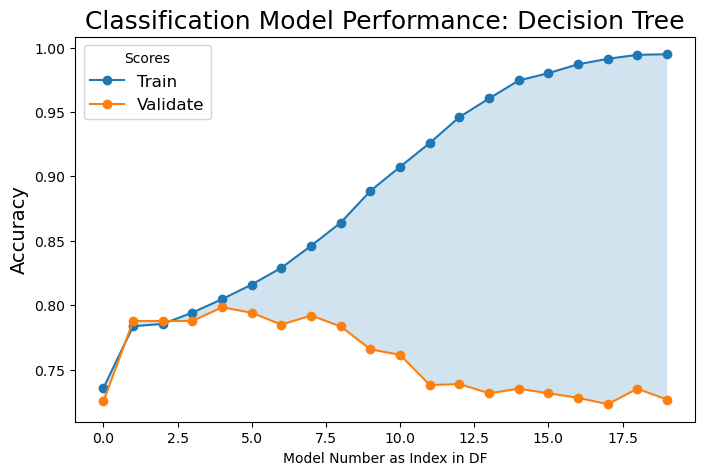

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,DecisionTree,"DecisionTreeClassifier(max_depth=1, random_state=123)",0.735858,0.725337,max_depth=1,0.010521,0.730598
1,DecisionTree,"DecisionTreeClassifier(max_depth=2, random_state=123)",0.783669,0.787793,max_depth=2,-0.004124,0.785731
2,DecisionTree,"DecisionTreeClassifier(max_depth=3, random_state=123)",0.785562,0.787793,max_depth=3,-0.002231,0.786677
3,DecisionTree,"DecisionTreeClassifier(max_depth=4, random_state=123)",0.794320,0.787793,max_depth=4,0.006527,0.791056
4,DecisionTree,"DecisionTreeClassifier(max_depth=5, random_state=123)",0.804734,0.798439,max_depth=5,0.006295,0.801586
5,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
6,DecisionTree,"DecisionTreeClassifier(max_depth=7, random_state=123)",0.829112,0.784954,max_depth=7,0.044159,0.807033
7,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102
8,DecisionTree,"DecisionTreeClassifier(max_depth=9, random_state=123)",0.864142,0.783534,max_depth=9,0.080608,0.823838
9,DecisionTree,"DecisionTreeClassifier(max_depth=10, random_state=123)",0.888757,0.765791,max_depth=10,0.122966,0.827274


In [67]:
dt_modeling(X_set,y_set,plot=True)

In [68]:
write_contents.append("""
def dt_modeling(X_set,y_set,r_parameter=123,n_models=20,plot=False):
    '''
    Returns a list of decision tree models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    r_parameter is for setting random_state.
    n_models defines how many models to create.
    '''
    # create list to hold stats
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = DecisionTreeClassifier(max_depth=i+1,random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'DecisionTree',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'max_depth='+str(i+1)
        }

        metrics.append(output)

    dt_metrics = pd.DataFrame(metrics)
    dt_metrics['difference'] = dt_metrics.train_acc - dt_metrics.validate_acc
    dt_metrics['average'] = dt_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(dt_metrics.index, dt_metrics.train_acc, label="Train", marker="o")
        plt.plot(dt_metrics.index, dt_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(dt_metrics.index, dt_metrics.train_acc, dt_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Decision Tree", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return dt_metrics
""")

In [69]:
def rf_modeling(X_set,y_set,n_models=20,r_parameter=123,plot=False):
    '''
    Returns a list of random forest models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    r_parameter is for setting random_state.
    n_models defines how many models to create.
    '''
    # loop random forest
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = RandomForestClassifier(max_depth=i+1,random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'RandomForest',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'max_depth='+str(i+1)
        }

        metrics.append(output)

    rf_metrics = pd.DataFrame(metrics)
    rf_metrics['difference'] = rf_metrics.train_acc - rf_metrics.validate_acc
    rf_metrics['average'] = rf_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(rf_metrics.index, rf_metrics.train_acc, label="Train", marker="o")
        plt.plot(rf_metrics.index, rf_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(rf_metrics.index, rf_metrics.train_acc, rf_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Random Forest", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return rf_metrics

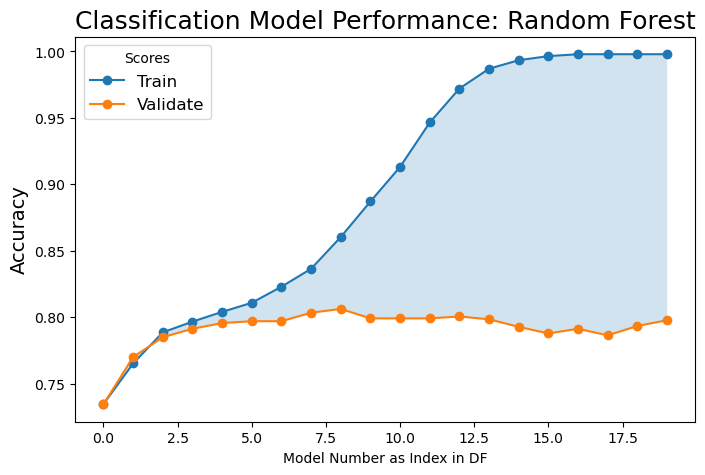

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,RandomForest,"(DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=843828734), Dec...",0.734675,0.734564,max_depth=1,0.000111,0.734619
1,RandomForest,"(DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=843828734), Dec...",0.765207,0.770050,max_depth=2,-0.004843,0.767628
2,RandomForest,"(DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=843828734), Dec...",0.788639,0.784954,max_depth=3,0.003685,0.786796
3,RandomForest,"(DecisionTreeClassifier(max_depth=4, max_features='sqrt', random_state=843828734), Dec...",0.796686,0.791341,max_depth=4,0.005345,0.794014
4,RandomForest,"(DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=843828734), Dec...",0.804024,0.795600,max_depth=5,0.008424,0.799812
5,RandomForest,"(DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=843828734), Dec...",0.810888,0.797019,max_depth=6,0.013868,0.803953
6,RandomForest,"(DecisionTreeClassifier(max_depth=7, max_features='sqrt', random_state=843828734), Dec...",0.822959,0.797019,max_depth=7,0.025939,0.809989
7,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
8,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300
9,RandomForest,"(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.887101,0.799148,max_depth=10,0.087952,0.843124


In [70]:
rf_modeling(X_set,y_set,plot=True)

In [71]:
write_contents.append("""
def rf_modeling(X_set,y_set,n_models=20,r_parameter=123,plot=False):
    '''
    Returns a list of random forest models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    r_parameter is for setting random_state.
    n_models defines how many models to create.
    '''
    # loop random forest
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = RandomForestClassifier(max_depth=i+1,random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'RandomForest',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'max_depth='+str(i+1)
        }

        metrics.append(output)

    rf_metrics = pd.DataFrame(metrics)
    rf_metrics['difference'] = rf_metrics.train_acc - rf_metrics.validate_acc
    rf_metrics['average'] = rf_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(rf_metrics.index, rf_metrics.train_acc, label="Train", marker="o")
        plt.plot(rf_metrics.index, rf_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(rf_metrics.index, rf_metrics.train_acc, rf_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Random Forest", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return rf_metrics
""")

In [72]:
def knn_modeling(X_set,y_set,n_models=20,plot=False):
    '''
    Returns a list of K-Nearest Neighbors models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    n_models defines how many models to create.
    '''
    # loop KNN
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = KNeighborsClassifier(n_neighbors=i+1)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'KNN',
            'model':model,
            'train_acc':model.score(np.ascontiguousarray(X_set[0]),y_set[0]),
            'validate_acc':model.score(np.ascontiguousarray(X_set[1]),y_set[1]),
            'hyperparameters':'n_neighbors='+str(i+1)
        }

        metrics.append(output)

    knn_metrics = pd.DataFrame(metrics)
    knn_metrics['difference'] = knn_metrics.train_acc - knn_metrics.validate_acc
    knn_metrics['average'] = knn_metrics[['train_acc','validate_acc']].mean(axis=1)

    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(knn_metrics.index, knn_metrics.train_acc, label="Train", marker="o")
        plt.plot(knn_metrics.index, knn_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(knn_metrics.index, knn_metrics.train_acc, knn_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: K-Nearest Neighbor", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return knn_metrics

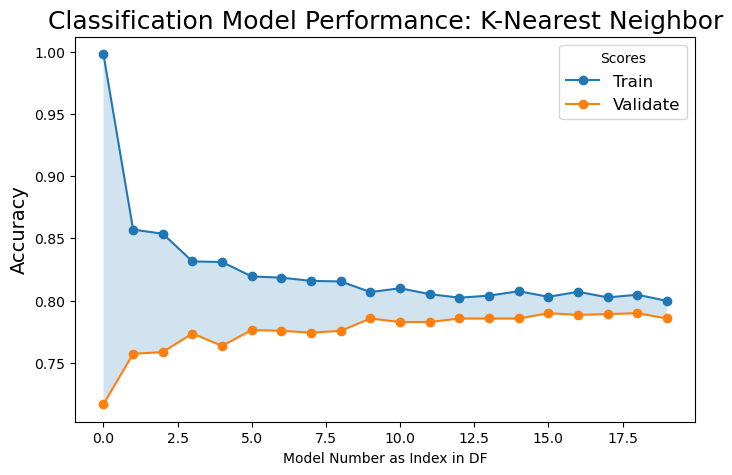

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,KNN,KNeighborsClassifier(n_neighbors=1),0.997870,0.716820,n_neighbors=1,0.281049,0.857345
1,KNN,KNeighborsClassifier(n_neighbors=2),0.857041,0.757275,n_neighbors=2,0.099767,0.807158
2,KNN,KNeighborsClassifier(n_neighbors=3),0.853728,0.758694,n_neighbors=3,0.095034,0.806211
3,KNN,KNeighborsClassifier(n_neighbors=4),0.831479,0.773598,n_neighbors=4,0.057881,0.802539
4,KNN,KNeighborsClassifier(),0.831006,0.763662,n_neighbors=5,0.067344,0.797334
5,KNN,KNeighborsClassifier(n_neighbors=6),0.819408,0.776437,n_neighbors=6,0.042971,0.797923
6,KNN,KNeighborsClassifier(n_neighbors=7),0.818462,0.775727,n_neighbors=7,0.042734,0.797095
7,KNN,KNeighborsClassifier(n_neighbors=8),0.815858,0.774308,n_neighbors=8,0.041550,0.795083
8,KNN,KNeighborsClassifier(n_neighbors=9),0.815385,0.775727,n_neighbors=9,0.039657,0.795556
9,KNN,KNeighborsClassifier(n_neighbors=10),0.806864,0.785664,n_neighbors=10,0.021200,0.796264


In [73]:
knn_modeling(X_set,y_set,plot=True)

In [74]:
write_contents.append("""
def knn_modeling(X_set,y_set,n_models=20,plot=False):
    '''
    Returns a list of K-Nearest Neighbors models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    n_models defines how many models to create.
    '''
    # loop KNN
    metrics = []

    for i in range(n_models):
        # print(i+1)
        model = KNeighborsClassifier(n_neighbors=i+1)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'KNN',
            'model':model,
            'train_acc':model.score(np.ascontiguousarray(X_set[0]),y_set[0]),
            'validate_acc':model.score(np.ascontiguousarray(X_set[1]),y_set[1]),
            'hyperparameters':'n_neighbors='+str(i+1)
        }

        metrics.append(output)

    knn_metrics = pd.DataFrame(metrics)
    knn_metrics['difference'] = knn_metrics.train_acc - knn_metrics.validate_acc
    knn_metrics['average'] = knn_metrics[['train_acc','validate_acc']].mean(axis=1)

    if plot==True:
        plt.figure(figsize=(8, 5))
        plt.plot(knn_metrics.index, knn_metrics.train_acc, label="Train", marker="o")
        plt.plot(knn_metrics.index, knn_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(knn_metrics.index, knn_metrics.train_acc, knn_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: K-Nearest Neighbor", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return knn_metrics
""")

In [75]:
def lr_modeling(X_set,y_set,n_models=20,r_parameter=123,plot=False):
    '''
    Returns a list of Logistic Regression models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    n_models defines how many models to create.
    r_parameter defines random_state hyperparameter
    '''
    # loop logistic regression
    metrics = []

    for i in range(n_models,0,-1):
        model = LogisticRegression(C=(i),random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'LogisticRegression',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'C='+str(i)
        }

        metrics.append(output)

    lr_metrics = pd.DataFrame(metrics)
    lr_metrics['difference'] = lr_metrics.train_acc - lr_metrics.validate_acc
    lr_metrics['average'] = lr_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot == True:
        plt.figure(figsize=(8, 5))
        plt.plot(lr_metrics.index, lr_metrics.train_acc, label="Train", marker="o")
        plt.plot(lr_metrics.index, lr_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(lr_metrics.index, lr_metrics.train_acc, lr_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Logistic Regression", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return lr_metrics

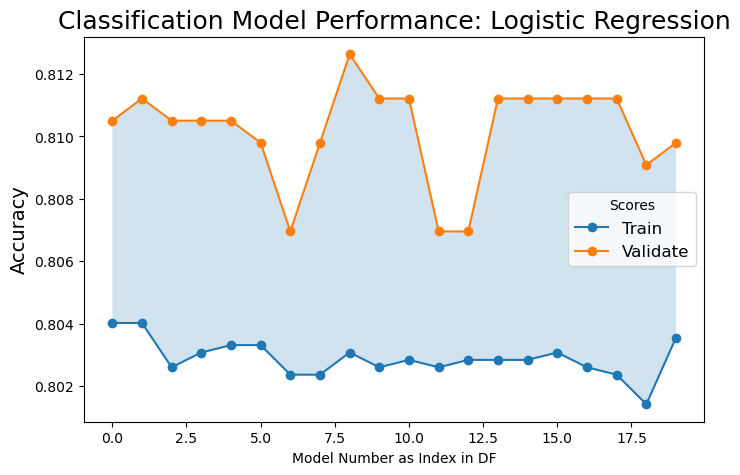

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,LogisticRegression,"LogisticRegression(C=20, random_state=123)",0.804024,0.810504,C=20,-0.006480,0.807264
1,LogisticRegression,"LogisticRegression(C=19, random_state=123)",0.804024,0.811214,C=19,-0.007190,0.807619
2,LogisticRegression,"LogisticRegression(C=18, random_state=123)",0.802604,0.810504,C=18,-0.007900,0.806554
3,LogisticRegression,"LogisticRegression(C=17, random_state=123)",0.803077,0.810504,C=17,-0.007427,0.806790
4,LogisticRegression,"LogisticRegression(C=16, random_state=123)",0.803314,0.810504,C=16,-0.007190,0.806909
5,LogisticRegression,"LogisticRegression(C=15, random_state=123)",0.803314,0.809794,C=15,-0.006481,0.806554
6,LogisticRegression,"LogisticRegression(C=14, random_state=123)",0.802367,0.806955,C=14,-0.004588,0.804661
7,LogisticRegression,"LogisticRegression(C=13, random_state=123)",0.802367,0.809794,C=13,-0.007427,0.806081
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855
9,LogisticRegression,"LogisticRegression(C=11, random_state=123)",0.802604,0.811214,C=11,-0.008610,0.806909


In [76]:
lr_modeling(X_set,y_set,plot=True)

In [77]:
write_contents.append(
"""
def lr_modeling(X_set,y_set,n_models=20,r_parameter=123,plot=False):
    '''
    Returns a list of Logistic Regression models with accuracy metrics. Can also plot the metrics for visualization.
    
    Requires X_set and y_set to run.
        - X_set is a list containing X_train,X_validate, and X_test. Only uses the first two.
        - y_set is a list containing y_train,y_validate, and y_test. Only uses the first two.
    Does not check for test sets.
    
    n_models defines how many models to create.
    r_parameter defines random_state hyperparameter
    '''
    # loop logistic regression
    metrics = []

    for i in range(n_models,0,-1):
        model = LogisticRegression(C=(i),random_state=r_parameter)

        model.fit(X_set[0],y_set[0])

        output = {
            'type':'LogisticRegression',
            'model':model,
            'train_acc':model.score(X_set[0],y_set[0]),
            'validate_acc':model.score(X_set[1],y_set[1]),
            'hyperparameters':'C='+str(i)
        }

        metrics.append(output)

    lr_metrics = pd.DataFrame(metrics)
    lr_metrics['difference'] = lr_metrics.train_acc - lr_metrics.validate_acc
    lr_metrics['average'] = lr_metrics[['train_acc','validate_acc']].mean(axis=1)
    
    if plot == True:
        plt.figure(figsize=(8, 5))
        plt.plot(lr_metrics.index, lr_metrics.train_acc, label="Train", marker="o")
        plt.plot(lr_metrics.index, lr_metrics.validate_acc, label="Validate", marker="o")
        plt.fill_between(lr_metrics.index, lr_metrics.train_acc, lr_metrics.validate_acc, alpha=0.2)
        plt.xlabel("Model Number as Index in DF", fontsize=10)
        plt.ylabel("Accuracy", fontsize=14)
        plt.title(f"Classification Model Performance: Logistic Regression", fontsize=18)
        plt.legend(title="Scores", fontsize=12)
        plt.show()
    
    return lr_metrics
"""
)

In [78]:
def metrics_filter(metric_df,y_train):
    '''
    Function to filter and select only the best models of the given algorithm.
    
    Accepts a dataframe of a metric and returns the dataframe limited to only the best three models.
    '''
    # get baseline
    baseline_acc = (y_train.mode()[0] == y_train).mean()
    print(f'baseline: {baseline_acc}')
    
    # drop anything below baseline
    metric_df = metric_df[metric_df.validate_acc > baseline_acc]

    # drop anything with a difference bigger than 0.1
    print(f'diff mean: {metric_df.difference.mean()}')
    metric_df = metric_df[metric_df.difference < metric_df.difference.mean()]

    # drop anything with an average less than average rounded to 1 decimal
    print(f'avg mean: {metric_df.average.mean()}')
    metric_df = metric_df[metric_df.average >= metric_df.average.mean()]

    # drop rows that are less than or equal to the validate mean
    print(f'val mean: {metric_df.validate_acc.mean()}')
    metric_df = metric_df[metric_df.validate_acc > metric_df.validate_acc.mean()]

    return metric_df.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:]

In [79]:
(y_set[0].mode()[0] == y_set[0]).mean()

0.7346745562130178

In [80]:
# test the metrics filter
knn_metrics = knn_modeling(X_set,y_set)
knn_metrics

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,KNN,KNeighborsClassifier(n_neighbors=1),0.997870,0.716820,n_neighbors=1,0.281049,0.857345
1,KNN,KNeighborsClassifier(n_neighbors=2),0.857041,0.757275,n_neighbors=2,0.099767,0.807158
2,KNN,KNeighborsClassifier(n_neighbors=3),0.853728,0.758694,n_neighbors=3,0.095034,0.806211
3,KNN,KNeighborsClassifier(n_neighbors=4),0.831479,0.773598,n_neighbors=4,0.057881,0.802539
4,KNN,KNeighborsClassifier(),0.831006,0.763662,n_neighbors=5,0.067344,0.797334
5,KNN,KNeighborsClassifier(n_neighbors=6),0.819408,0.776437,n_neighbors=6,0.042971,0.797923
6,KNN,KNeighborsClassifier(n_neighbors=7),0.818462,0.775727,n_neighbors=7,0.042734,0.797095
7,KNN,KNeighborsClassifier(n_neighbors=8),0.815858,0.774308,n_neighbors=8,0.041550,0.795083
8,KNN,KNeighborsClassifier(n_neighbors=9),0.815385,0.775727,n_neighbors=9,0.039657,0.795556
9,KNN,KNeighborsClassifier(n_neighbors=10),0.806864,0.785664,n_neighbors=10,0.021200,0.796264


In [81]:
metrics_filter(knn_metrics,y_set[0])

baseline: 0.7346745562130178
diff mean: 0.03624557970196047
avg mean: 0.7956718337621325
val mean: 0.7873872047044509


,type,model,train_acc,validate_acc,hyperparameters,difference,average
15,KNN,KNeighborsClassifier(n_neighbors=16),0.803077,0.789922,n_neighbors=16,0.013155,0.796499
17,KNN,KNeighborsClassifier(n_neighbors=18),0.802604,0.789212,n_neighbors=18,0.013391,0.795908
18,KNN,KNeighborsClassifier(n_neighbors=19),0.804734,0.789922,n_neighbors=19,0.014812,0.797328
16,KNN,KNeighborsClassifier(n_neighbors=17),0.807101,0.788502,n_neighbors=17,0.018598,0.797802


In [82]:
dt_metrics = dt_modeling(X_set,y_set)
dt_metrics

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,DecisionTree,"DecisionTreeClassifier(max_depth=1, random_state=123)",0.735858,0.725337,max_depth=1,0.010521,0.730598
1,DecisionTree,"DecisionTreeClassifier(max_depth=2, random_state=123)",0.783669,0.787793,max_depth=2,-0.004124,0.785731
2,DecisionTree,"DecisionTreeClassifier(max_depth=3, random_state=123)",0.785562,0.787793,max_depth=3,-0.002231,0.786677
3,DecisionTree,"DecisionTreeClassifier(max_depth=4, random_state=123)",0.794320,0.787793,max_depth=4,0.006527,0.791056
4,DecisionTree,"DecisionTreeClassifier(max_depth=5, random_state=123)",0.804734,0.798439,max_depth=5,0.006295,0.801586
5,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
6,DecisionTree,"DecisionTreeClassifier(max_depth=7, random_state=123)",0.829112,0.784954,max_depth=7,0.044159,0.807033
7,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102
8,DecisionTree,"DecisionTreeClassifier(max_depth=9, random_state=123)",0.864142,0.783534,max_depth=9,0.080608,0.823838
9,DecisionTree,"DecisionTreeClassifier(max_depth=10, random_state=123)",0.888757,0.765791,max_depth=10,0.122966,0.827274


In [83]:
metrics_filter(dt_metrics,y_set[0])

baseline: 0.7346745562130178
diff mean: 0.09781204873632673
avg mean: 0.8025202208121082
val mean: 0.7886799148332151


,type,model,train_acc,validate_acc,hyperparameters,difference,average
5,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
7,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102


In [84]:
metrics_filter(
    rf_modeling(X_set,y_set),
    y_set[0]
)

baseline: 0.7346745562130178
diff mean: 0.10951333676222548
avg mean: 0.8065050681516259
val mean: 0.8014549325762952


,type,model,train_acc,validate_acc,hyperparameters,difference,average
7,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
8,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300


In [85]:
metrics_filter(
    lr_modeling(X_set,y_set),
    y_set[0]
)

baseline: 0.7346745562130178
diff mean: -0.007296954069569689
avg mean: 0.8067804533549471
val mean: 0.8112924848198091


,type,model,train_acc,validate_acc,hyperparameters,difference,average
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [86]:
# see if we need to make another function to further limit
dt_metric = dt_modeling(X_set,y_set)
rf_metric = rf_modeling(X_set,y_set)
knn_metric = knn_modeling(X_set,y_set)
lr_metric = lr_modeling(X_set,y_set)

In [87]:
dt_metric = metrics_filter(dt_metric,y_set[0])
rf_metric = metrics_filter(rf_metric,y_set[0])
knn_metric = metrics_filter(knn_metric,y_set[0])
lr_metric = metrics_filter(lr_metric,y_set[0])

baseline: 0.7346745562130178
diff mean: 0.09781204873632673
avg mean: 0.8025202208121082
val mean: 0.7886799148332151
baseline: 0.7346745562130178
diff mean: 0.10951333676222548
avg mean: 0.8065050681516259
val mean: 0.8014549325762952
baseline: 0.7346745562130178
diff mean: 0.03624557970196047
avg mean: 0.7956718337621325
val mean: 0.7873872047044509
baseline: 0.7346745562130178
diff mean: -0.007296954069569689
avg mean: 0.8067804533549471
val mean: 0.8112924848198091


In [88]:
dt_metric

,type,model,train_acc,validate_acc,hyperparameters,difference,average
5,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
7,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102


In [89]:
rf_metric

,type,model,train_acc,validate_acc,hyperparameters,difference,average
7,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
8,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300


In [90]:
knn_metric

,type,model,train_acc,validate_acc,hyperparameters,difference,average
15,KNN,KNeighborsClassifier(n_neighbors=16),0.803077,0.789922,n_neighbors=16,0.013155,0.796499
17,KNN,KNeighborsClassifier(n_neighbors=18),0.802604,0.789212,n_neighbors=18,0.013391,0.795908
18,KNN,KNeighborsClassifier(n_neighbors=19),0.804734,0.789922,n_neighbors=19,0.014812,0.797328
16,KNN,KNeighborsClassifier(n_neighbors=17),0.807101,0.788502,n_neighbors=17,0.018598,0.797802


In [91]:
lr_metric

,type,model,train_acc,validate_acc,hyperparameters,difference,average
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [92]:
models = pd.concat([dt_metric,rf_metric,knn_metric,lr_metric],ignore_index=True)
models

,type,model,train_acc,validate_acc,hyperparameters,difference,average
0,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
1,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102
2,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
3,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300
4,KNN,KNeighborsClassifier(n_neighbors=16),0.803077,0.789922,n_neighbors=16,0.013155,0.796499
5,KNN,KNeighborsClassifier(n_neighbors=18),0.802604,0.789212,n_neighbors=18,0.013391,0.795908
6,KNN,KNeighborsClassifier(n_neighbors=19),0.804734,0.789922,n_neighbors=19,0.014812,0.797328
7,KNN,KNeighborsClassifier(n_neighbors=17),0.807101,0.788502,n_neighbors=17,0.018598,0.797802
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [93]:
models.sort_values(['difference','validate_acc','train_acc'],ascending=[True,False,False])[:]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855
4,KNN,KNeighborsClassifier(n_neighbors=16),0.803077,0.789922,n_neighbors=16,0.013155,0.796499
5,KNN,KNeighborsClassifier(n_neighbors=18),0.802604,0.789212,n_neighbors=18,0.013391,0.795908
6,KNN,KNeighborsClassifier(n_neighbors=19),0.804734,0.789922,n_neighbors=19,0.014812,0.797328
7,KNN,KNeighborsClassifier(n_neighbors=17),0.807101,0.788502,n_neighbors=17,0.018598,0.797802
0,DecisionTree,"DecisionTreeClassifier(max_depth=6, random_state=123)",0.816095,0.794180,max_depth=6,0.021914,0.805137
2,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
1,DecisionTree,"DecisionTreeClassifier(max_depth=8, random_state=123)",0.846154,0.792051,max_depth=8,0.054103,0.819102
3,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300


In [94]:
def final_models(models,val_cutoff=0.8,avg_cutoff=0.8):
    '''
    Takes a series of DataFrames containing models in the form of a list.
    
    Expects a list, returns a single DataFrame holding the top three models.
    '''
    # turn models into dataframe
    models = pd.concat(models,ignore_index=True)
    
    models = models[models.validate_acc > val_cutoff]
    models = models[models.average > avg_cutoff]
    
    return models[:3]

In [95]:
models[models.validate_acc > 0.8]

,type,model,train_acc,validate_acc,hyperparameters,difference,average
2,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
3,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [96]:
final_models([dt_metric,rf_metric,knn_metric,lr_metric])

,type,model,train_acc,validate_acc,hyperparameters,difference,average
2,RandomForest,"(DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=843828734), Dec...",0.836450,0.803407,max_depth=8,0.033043,0.819928
3,RandomForest,"(DecisionTreeClassifier(max_depth=9, max_features='sqrt', random_state=843828734), Dec...",0.860355,0.806246,max_depth=9,0.054109,0.833300
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [97]:
metrics_filter(models,y_set[0])

baseline: 0.7346745562130178
diff mean: 0.023729971083795362
avg mean: 0.8000881904577924
val mean: 0.8034066713981547


,type,model,train_acc,validate_acc,hyperparameters,difference,average
8,LogisticRegression,"LogisticRegression(C=12, random_state=123)",0.803077,0.812633,C=12,-0.009556,0.807855


In [98]:
write_contents.append("""
def final_models(models,val_cutoff=0.8,avg_cutoff=0.8):
    '''
    Takes a series of DataFrames containing models in the form of a list.
    
    Expects a list, returns a single DataFrame holding the top three models.
    '''
    # turn models into dataframe
    models = pd.concat(models,ignore_index=True)
    
    models = models[models.validate_acc > val_cutoff]
    models = models[models.average > avg_cutoff]
    
    return models[:3]
""")

In [99]:
# write_contents

In [200]:
with open('model.py','a') as file:
    for content in write_contents:
        file.write(content + '\n')